<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://drive.google.com/uc?id=1Z28D9EByVRTyiKZspxKpRgckW7dVVnKi">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Assignment Info -->  
        <center>
        <h2>COMP9517 Computer Vision 20T2</h2>
          <h3>Lab 04</h3>
          <br>
        <strong>Student Name: Raymond Lu<br>Student Number: z5277884</strong>
    </center>
    <!-- Assignment Info -->	
  </div>
<!-- ---------------------------------------------------- -->

## 1. Set Up

#### Tuning Parameters

In [28]:
NEIGHBOR_NUM = 10
TEST_SIZE = 0.25

### Step 1 Import Relevant Packages

In [29]:
# packages introduced in the Lab Specification
from sklearn import metrics
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier

In [30]:
# extra packages imported
from matplotlib import pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

### Step 2 Load Image

(1797, 64)


Text(0.5, 1.0, 'Label : 0\n')

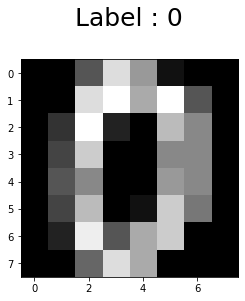

In [31]:
digits = load_digits() 
print(digits.data.shape)
plt.imshow(np.reshape(digits.data[0],(8,8)),cmap='gray') 
plt.title('Label : %i\n'% digits.target[0],fontsize=25) 

### Step 3 Split Images

In [32]:
X = digits.data 
Y = digits.target 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=TEST_SIZE,random_state=42)

## 2. Classification

### Step 4 Initialize Models

In [33]:

neigh = KNeighborsClassifier(n_neighbors=NEIGHBOR_NUM) 
sgd = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000,tol=1e-3)) 
dt = DecisionTreeClassifier(random_state=1) 

### Step 5 Fit the Models

In [34]:
neigh.fit(X_train,Y_train) 
sgd.fit(X_train,Y_train) 
dt.fit(X_train,Y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### Step 6 Evaluate Test Data

In [35]:
neigh_pred = neigh.predict(X_test) 
sgd_pred = sgd.predict(X_test) 
dt_pred = dt.predict(X_test) 

### Step 7 Evaluation Performance

In [36]:
print("COMP9517 Week 5 Lab - z5277884","\n")
print("Test size = ",TEST_SIZE) 
print("KNN Accuracy: ",accuracy_score(Y_test,neigh_pred),
      "\t","Recall: ",recall_score(Y_test,neigh_pred,average='micro')) 
print("SGD Accuracy: ",accuracy_score(Y_test,sgd_pred),
      "\t","Recall: ",recall_score(Y_test,sgd_pred,average='micro')) 
print("DT Accuracy: ",accuracy_score(Y_test,dt_pred),
      "\t","Recall: ",recall_score(Y_test,dt_pred,average='micro')) 

print("\n","KNN Confusion Matrix:")
num_labels = [i for i in range(10)]
print(confusion_matrix(Y_test,neigh_pred,labels=num_labels))

COMP9517 Week 5 Lab - z5277884 

Test size =  0.25
KNN Accuracy:  0.9866666666666667 	 Recall:  0.9866666666666667
SGD Accuracy:  0.9488888888888889 	 Recall:  0.9488888888888889
DT Accuracy:  0.8822222222222222 	 Recall:  0.8822222222222222

 KNN Confusion Matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 57  1  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  2  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  1  1  0  0  0 46]]
